Random Walk
=======

# Theory
**Random Walk (RW)** is a stochastic process that simulate the path drawn by successive random increments of an object in space

## Definition
Informally, **RW** is nothing but a series of moves/increments in space where each move; going from current position/state to neighboring position, is chosen probabilistically. Hence, if one would draw a path tracing the process it would look random. To illustrate this, the following figure is  path drawn by **RW** process in 2D
<div style="text-align:center"><img src="https://upload.wikimedia.org/wikipedia/commons/c/c0/Random_walk_25000.gif" width="400"/></div>

In formal terms, random walk is an illustration of discrete stochastic process with the following properties
- stationary
- increments are i.i.d 

If looked carfully random walk is just an example of discrete-time space markov chain. with noting that not all random walks are markov chains

Formally; considering a process on $1D$ discrete lattice for simplicity, let an object starting at position $X_0$ sample its next move to its neighboring positions from the following distribution
$$
\begin{equation*}
\Delta X_1 \sim 
\begin{cases} 
   +1 & \text{with probability } p\\
   -1 & \text{with probability } q
\end{cases}
\end{equation*}
$$

where $\Delta X_1 = X_1 - X_0$ is the change of object position "i.e. move or increment". **RW** is the process of repeating this probabilistic moves $n$ times. This process can be formulated using the state "i.e. position" equation of the object after $n$ moves
$$
\begin{equation}
 X_n = X_{n-1} + \Delta X_n = X_0 + \sum_{i=0}^n \Delta X_i
\end{equation}
$$

### Algorithm


## Examples


# Implementation


## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters

In [3]:
number_steps = 1000

## Algorithm


In [4]:
def RW(x_0: float, p: list[float], steps: int) -> tuple[float, list, int]:
    '''

    '''

    states=np.zeros(steps)
    states[0] = x_0

    for i in range(steps-1):
        
        move = np.random.choice([1, -1], p=p)
        states[i+1] = states[i] + move

    return np.array(range(steps)), states

In [5]:
def RW_distribution(x_0: float, p: list[float], steps: int, samples: int = int(1e4)) -> tuple[float, list, int]:
    '''
    Computing where the random walk process will end based on stochastic process formula
    defined by the standard Wiener process
    '''

    mu = 2*p[0] - 1
    sigma = 4*p[0]*(1 - p[0])
    
    r = 1/steps
    t = steps*r

    distribution_samples = np.zeros(samples)

    for i in range(samples):
        
        wiener = np.random.normal(0, t)
        distribution_samples[i] = x_0 + mu*(t/r) + (np.sqrt(sigma)/np.sqrt(r))*wiener

    return distribution_samples

## Results Visualization & Behaver Analysis


In [6]:
steps, states = RW(x_0=0, p=[0.5, 0.5], steps=number_steps)

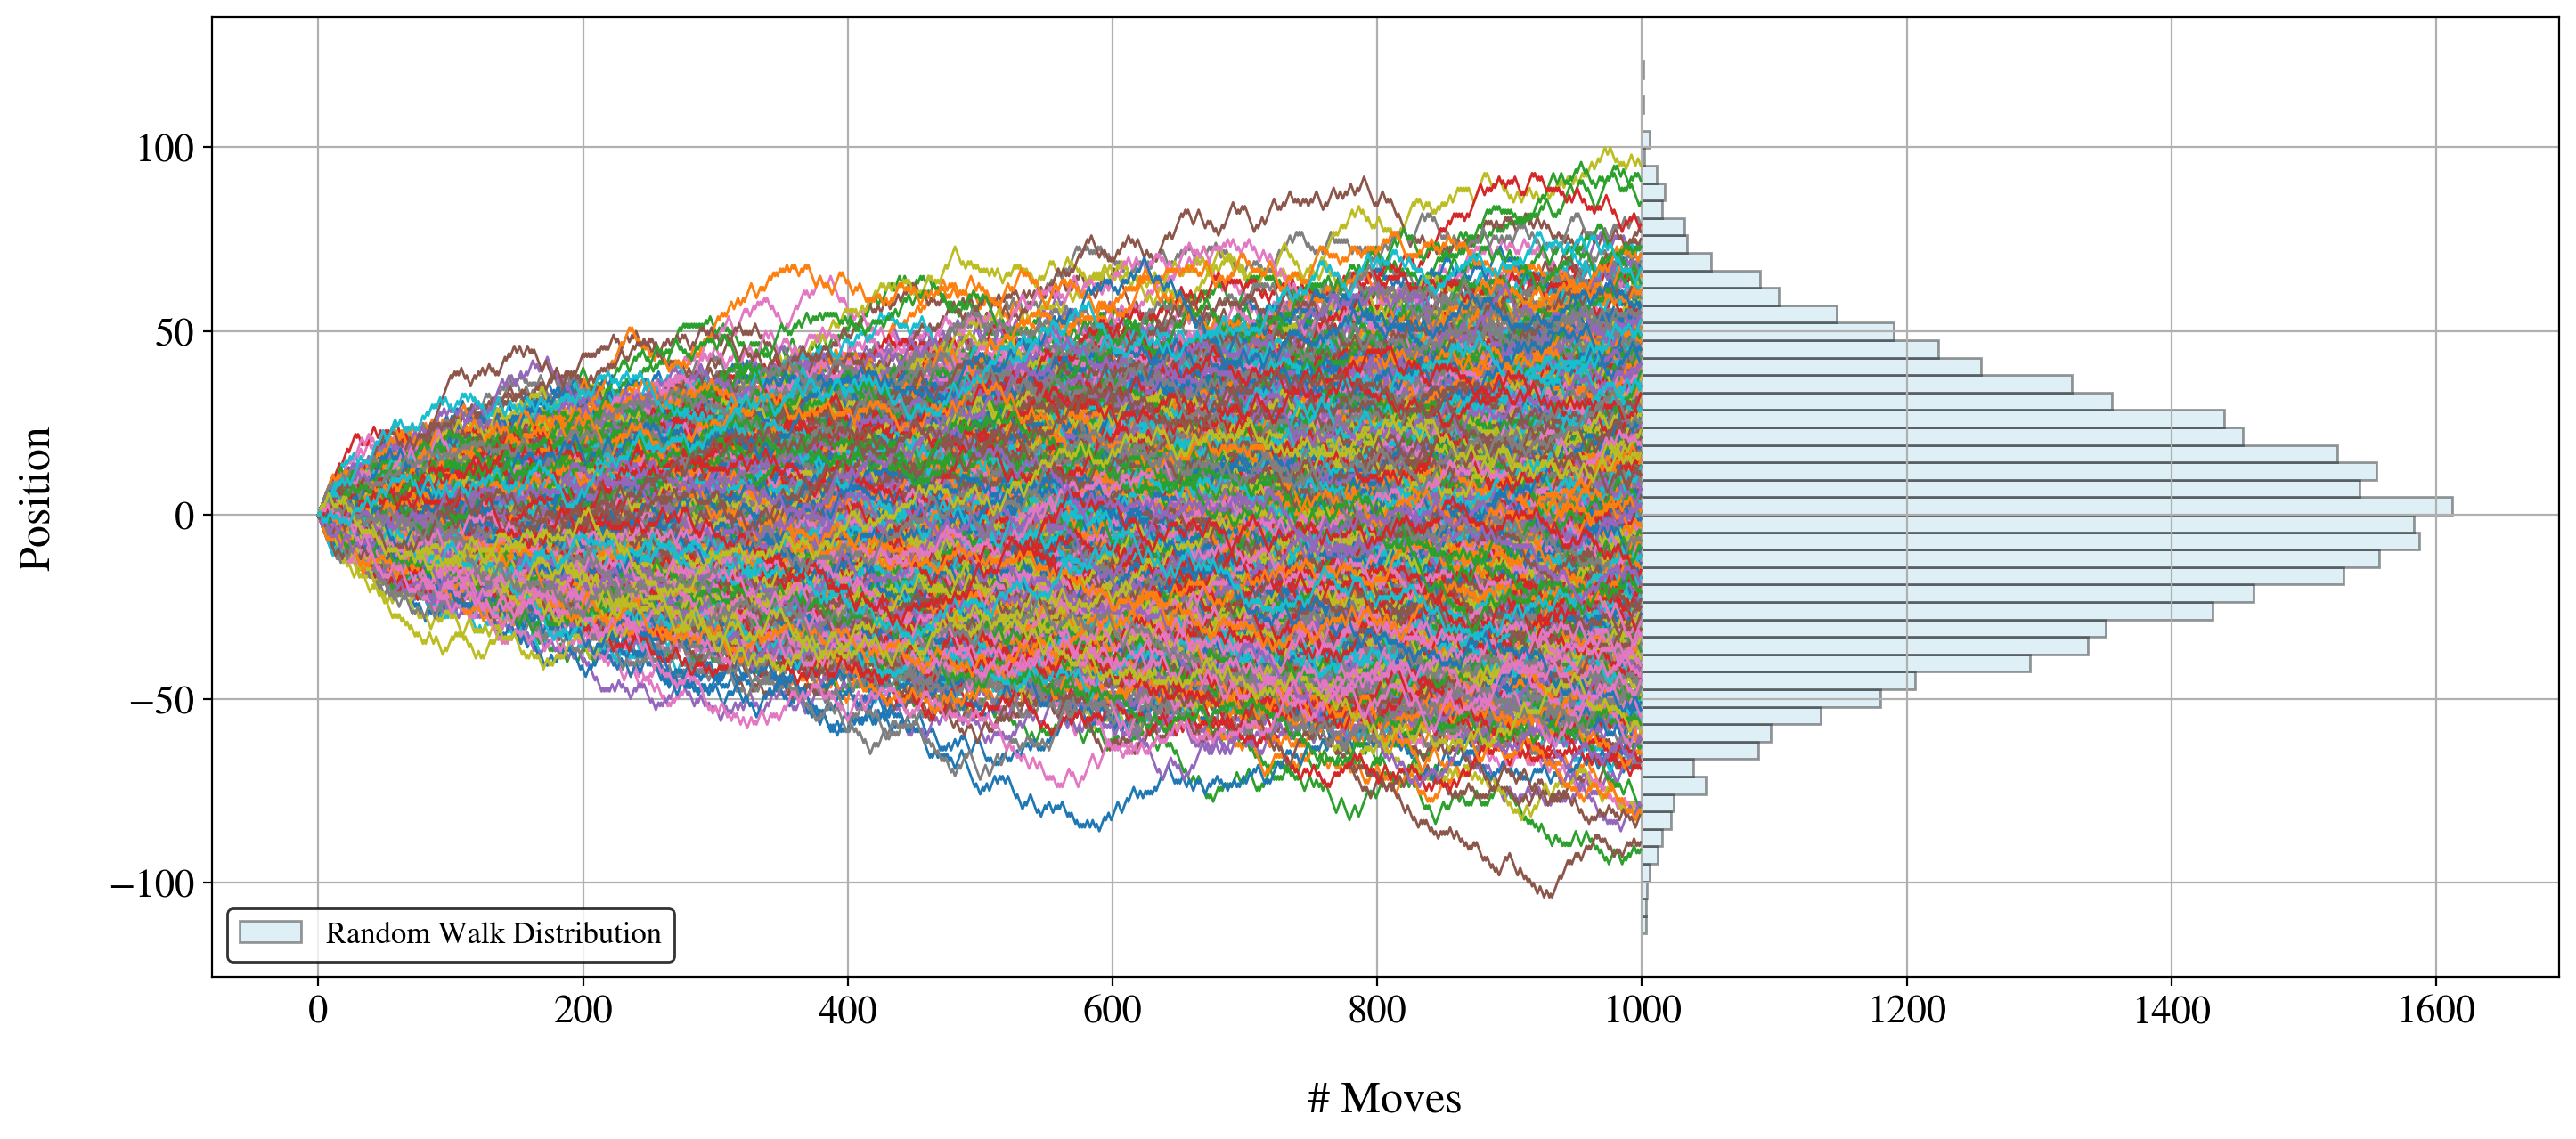

In [15]:

fig, ax = plt.subplots(figsize=(17,7))


for i in range(1000):
    steps, states = RW(x_0=0, p=[0.5, 0.5], steps=number_steps)
    ax.plot(steps, states)

rw_dis = RW_distribution(x_0=0, p=[0.5, 0.5], steps=number_steps, samples=int(1e4))
ax.hist(rw_dis, bins=50, orientation="horizontal", bottom=number_steps, edgecolor='black', facecolor='lightblue', alpha=0.4, label="Random Walk Distribution")


# Set labels on joint
ax.set(xlabel='# Moves', ylabel='Position')
ax.grid(True)
ax.legend()

# Set labels on marginals
plt.show()

In [8]:
plt.style.use([
    'latex_plots.mplstyle',
    {
        "figure.figsize": (15,8),
        "figure.dpi": 200
    }
])

Text(0, 0.5, 'Position')

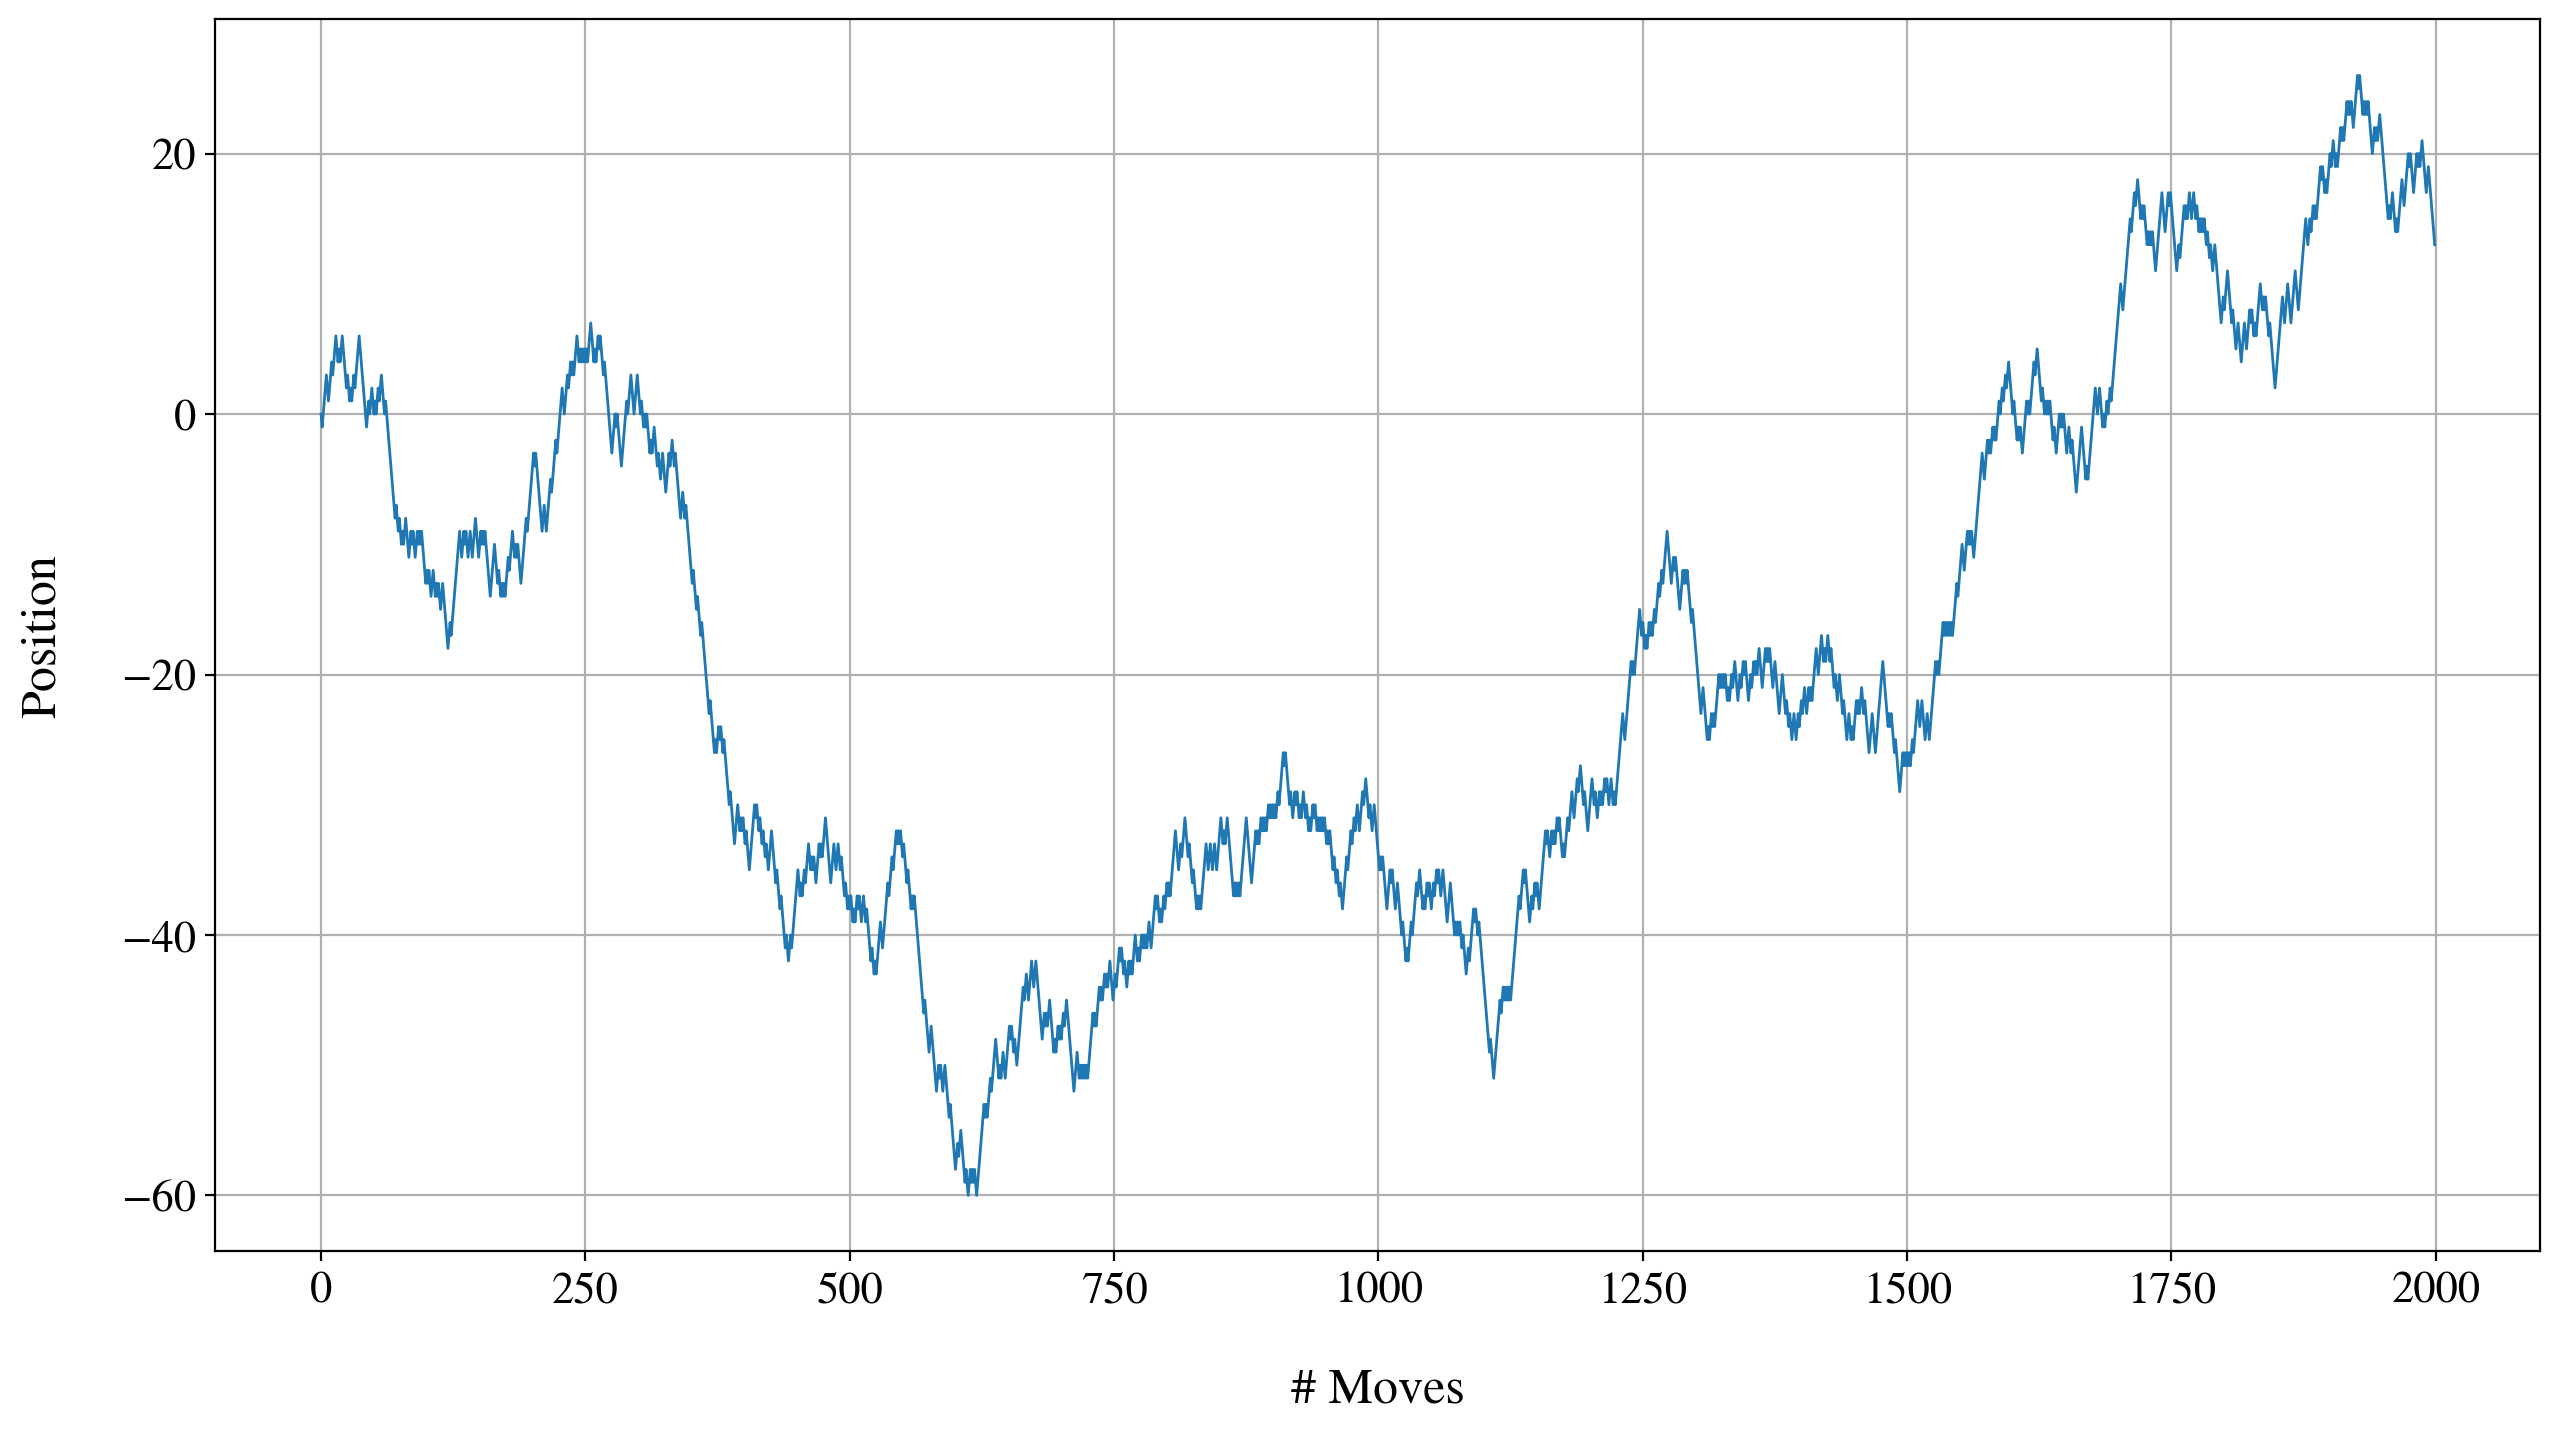

In [9]:
steps3, states3 = RW(x_0=0, p=[0.5, 0.5], steps=2000)
plt.plot(steps3, states3, "-")
plt.grid(True)
plt.xlabel("# Moves")
plt.ylabel("Position")